<a href="https://colab.research.google.com/github/gabychoi/comment-clean-bot/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import warnings

warnings.filterwarnings('ignore')

In [247]:
import pandas as pd
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [248]:
import glob
import re

from tqdm import tqdm_notebook

In [249]:
# ÌÅ¨Î°§ÎßÅÌïú Ï†ÑÏ≤¥ ÎåìÍ∏Ä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
raw_data = pd.read_csv('/content/gdrive/My Drive/eda_data/repl_data.csv')

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
len(raw_data)

127125

In [250]:
# Ï§ëÎ≥µ ÎåìÍ∏Ä Ï†úÍ±∞
repl_data = raw_data.drop_duplicates(subset='ÎåìÍ∏Ä', keep='first', inplace=False)

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
repl_data = repl_data.loc[repl_data['ÎåìÍ∏Ä'].notnull(), ]

# Ï§ëÎ≥µ&Í≤∞Ï∏°Ïπò Ï†úÍ±∞ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
len(repl_data)

118999

In [251]:
# Ï†ïÍ∑úÌëúÌòÑÏãù Ï†ÑÍ≥º ÌõÑÎ•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ ÏÑ∏Î°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
preprocessing_df = repl_data.copy()
preprocessing_df.head()

Unnamed: 0  ...                               Ï∂úÏ≤ò
0           0  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
1           1  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
2           2  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
3           3  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
4           4  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv

[5 rows x 4 columns]

In [252]:
# @[ÏïÑÏù¥Îîî] Ï†úÍ±∞
preprocessing_df['ÎåìÍ∏Ä'] = preprocessing_df['ÎåìÍ∏Ä'].str.replace('@[a-zA-ZÍ∞Ä-Ìû£\w\.\_\d]+', '')


In [253]:
# ÌïúÍ∏Ä/ÏòÅÏñ¥/Ïà´ÏûêÎ•º Ï†úÏô∏Ìïú Î¨∏ÏûêÏ†úÍ±∞ : Ïù¥Î™®Ìã∞ÏΩòÏù¥ÎÇò ÌäπÏàòÎ¨∏ÏûêÎ•º Ï†úÍ±∞ÌïúÎã§
preprocessing_df['ÎåìÍ∏Ä'] = preprocessing_df['ÎåìÍ∏Ä'].str.replace('[^a-zA-ZÍ∞Ä-Ìû£0-9„Ñ±-„Öé„Öè-„Ö£\s]', '')
preprocessing_df['ÎåìÍ∏Ä'] = preprocessing_df['ÎåìÍ∏Ä'].str.replace('\s[\s*]', '')

In [254]:
# Ïñë ÏòÜ Îπà Í≥µÎ∞± Ï†úÍ±∞
preprocessing_df['ÎåìÍ∏Ä'] = preprocessing_df['ÎåìÍ∏Ä'].str.rstrip()
preprocessing_df['ÎåìÍ∏Ä'] = preprocessing_df['ÎåìÍ∏Ä'].str.lstrip()

In [255]:
# ÎπàÎåìÍ∏Ä Ï†úÍ±∞
preprocessing_df = preprocessing_df[preprocessing_df['ÎåìÍ∏Ä'] != '']
preprocessing_df = preprocessing_df[preprocessing_df['ÎåìÍ∏Ä'] != ' ']

In [256]:
# ÏòÅÏñ¥Îßå ÏûàÎäî Ìñâ Ï†úÍ±∞
preprocessing_df = preprocessing_df['ÎåìÍ∏Ä']

In [257]:
comment_df = pd.DataFrame(preprocessing_df)
comment_df['ÎåìÍ∏Ä'].str.lower()

1         Ïã¨Í∞ÅÌóàÎã§ Î≤ïÏïà Í≤ÄÌÜ†ÎèÑ Ïïà ÌïòÎäî ÏùòÏõêÎì§ ÎÇ¥ ÏÑ∏Í∏àÏúºÎ°ú Ìò∏ÏùòÌò∏Ïãù ÌïúÎã§ ÏÉùÍ∞ÅÌïòÎãàÍπå Ïó¥Î∞õÎÑ§ ...
2         Ï∞®ÎèÑÏóêÏÑú 25kmÏ†úÌïú Îë† Ïñ¥Ï©åÏûêÎäîÍ±¥ÏßÄ ÏûêÏ†ÑÍ±∞ Ïò§ÌÜ†Î∞îÏù¥ÎèÑ Í∑∏Í±∞Î≥¥Îã§ Îπ†Î•¥Îã§ Ïù∏ÎèÑ Ï∞®ÎèÑ ...
3                                       Íµ≠ÌöåÏùòÏõêÏßÅ Îã§ Î∞ïÌÉàÌñàÏúºÎ©¥ Ï¢ãÍ≤†ÎÑ§„Ö†„Ö†
4                                        Ìëú ÏñªÏùÑ ÏÉùÍ∞Å ÎßêÍ≥† Î≤ïÏùÑ ÎßåÎì§Ïñ¥Îùº
5                              Ï¥àÎî© Ïï†Îì§Ïù¥ Î™∞Í≥†Îã§ÎãàÎäî ÌòïÌòïÏÉâÏÉâ ÏîΩÏîΩÏù¥ ÏÉùÍ∞ÅÌñàÎÇòÎ≥¥ÎÑ§
                                ...                        
127118                                              Ïò§Îπ† Ïñ¥ÎîîÏòàÏöî
127119                                               Ïô∏Íµ≠ Í∞îÏñ¥Ïöî
127121                                 Ïù¥Í±¥ ÌôçÎßàÎã¥ÏóêÏÑú Íµ¨ÏûÖ Î™ªÌïòÎÇòÏöî „Öé„Öé„Öé
127122                                           ÎäêÎ¨¥ ÏûòÎ®πÎäî Ïòà 9
127123                               ÎßõÏûàÎäîÍ±¥ ÎààÏúºÎ°úÎßå Î¥êÎèÑ ÏïåÏ£†ÎßõÏûàÍ≤å ÎìúÏÑ∏Ïöî
Na

In [258]:
preprocessing_df = comment_df[~comment_df['ÎåìÍ∏Ä'].str.isalpha()]

In [259]:
preprocessing_df.shape

(92063, 1)

**ÏïÖÏÑ±Îã®Ïñ¥ Î≠âÏπò ÌïÑÌÑ∞ÎßÅ - ÎùºÎ≤®2**

In [260]:
preprocessing_df['ÏïÖÌîåÏó¨Î∂Ä'] = np.NaN
preprocessing_df.head()

ÎåìÍ∏Ä  ÏïÖÌîåÏó¨Î∂Ä
1  Ïã¨Í∞ÅÌóàÎã§ Î≤ïÏïà Í≤ÄÌÜ†ÎèÑ Ïïà ÌïòÎäî ÏùòÏõêÎì§ ÎÇ¥ ÏÑ∏Í∏àÏúºÎ°ú Ìò∏ÏùòÌò∏Ïãù ÌïúÎã§ ÏÉùÍ∞ÅÌïòÎãàÍπå Ïó¥Î∞õÎÑ§ ...   NaN
2  Ï∞®ÎèÑÏóêÏÑú 25kmÏ†úÌïú Îë† Ïñ¥Ï©åÏûêÎäîÍ±¥ÏßÄ ÏûêÏ†ÑÍ±∞ Ïò§ÌÜ†Î∞îÏù¥ÎèÑ Í∑∏Í±∞Î≥¥Îã§ Îπ†Î•¥Îã§ Ïù∏ÎèÑ Ï∞®ÎèÑ ...   NaN
3                                Íµ≠ÌöåÏùòÏõêÏßÅ Îã§ Î∞ïÌÉàÌñàÏúºÎ©¥ Ï¢ãÍ≤†ÎÑ§„Ö†„Ö†   NaN
4                                 Ìëú ÏñªÏùÑ ÏÉùÍ∞Å ÎßêÍ≥† Î≤ïÏùÑ ÎßåÎì§Ïñ¥Îùº   NaN
5                       Ï¥àÎî© Ïï†Îì§Ïù¥ Î™∞Í≥†Îã§ÎãàÎäî ÌòïÌòïÏÉâÏÉâ ÏîΩÏîΩÏù¥ ÏÉùÍ∞ÅÌñàÎÇòÎ≥¥ÎÑ§   NaN

In [261]:
filter_word_df = pd.read_excel('/content/gdrive/My Drive/eda_data/ÌïÑÌÑ∞ÎßÅÎã®Ïñ¥.xlsx')

In [262]:
filter_word_df.shape[1]

13

In [263]:
for col in tqdm_notebook(range(filter_word_df.shape[1])):
    word_list = list(filter_word_df.iloc[:, col])[0].split(', ')
    label = filter_word_df.columns[col][-2]

    for filter_word in tqdm_notebook(word_list):
        preprocessing_df.loc[ preprocessing_df['ÎåìÍ∏Ä'].str.match('.*' + filter_word + '.*'), 'ÏïÖÌîåÏó¨Î∂Ä' ] = label

In [264]:
preprocessing_df
preprocessing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92063 entries, 1 to 127123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ÎåìÍ∏Ä      92063 non-null  object
 1   ÏïÖÌîåÏó¨Î∂Ä    8856 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB


In [281]:
# ÏïÖÌîå ÌïÑÌÑ∞ÎßÅÎêú Í∞úÏàò ÌôïÏù∏
preprocessing_df.fillna(0,  inplace=True)
word_label = preprocessing_df.groupby(['ÏïÖÌîåÏó¨Î∂Ä']).size()
word_label_df = pd.DataFrame(word_label)
word_label_df.columns = ['Í∞úÏàò']
word_label_df.head()

Í∞úÏàò
ÏïÖÌîåÏó¨Î∂Ä       
0     83207
2      8856

In [265]:
# ÏïÖÌîå ÌïÑÌÑ∞ÎßÅ/ÎÖ∏ÌïÑÌÑ∞ÎßÅ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [284]:
# ÎåìÍ∏ÄÍ∏∏Ïù¥ Ïª¨Îüº Ï∂îÍ∞Ä Î∞è ÏµúÎåÄÍ∏∏Ïù¥ ÌôïÏù∏
preprocessing_df['ÎåìÍ∏ÄÍ∏∏Ïù¥'] = preprocessing_df['ÎåìÍ∏Ä'].apply(lambda x : len(str(x)))
preprocessing_df['ÎåìÍ∏ÄÍ∏∏Ïù¥'].max()

1978

In [283]:
# ÎåìÍ∏ÄÍ∏∏Ïù¥ ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [285]:
len_int = preprocessing_df['ÎåìÍ∏ÄÍ∏∏Ïù¥'].astype(int)
len_sort = len_int.sort_values()
sort_df = pd.DataFrame(len_sort)

len_count = pd.DataFrame(sort_df.groupby(['ÎåìÍ∏ÄÍ∏∏Ïù¥']).size())
len_count.columns = ['ÎåìÍ∏ÄÍ∞úÏàò']
len_count

ÎåìÍ∏ÄÍ∞úÏàò
ÎåìÍ∏ÄÍ∏∏Ïù¥      
1       19
2       56
3      148
4      515
5     1445
...    ...
1812     1
1846     1
1921     1
1945     1
1978     1

[739 rows x 1 columns]

In [286]:
len_count.reset_index(level=0, inplace=True)

In [289]:
len_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ÎåìÍ∏ÄÍ∏∏Ïù¥    739 non-null    int64
 1   ÎåìÍ∏ÄÍ∞úÏàò    739 non-null    int64
dtypes: int64(2)
memory usage: 11.7 KB


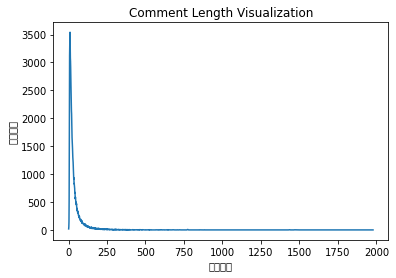

In [290]:
plt.title('Comment Length Visualization')
plt.plot(len_count['ÎåìÍ∏ÄÍ∏∏Ïù¥'], len_count['ÎåìÍ∏ÄÍ∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
plt.xlabel('ÎåìÍ∏ÄÍ∏∏Ïù¥')
plt.ylabel('ÎåìÍ∏ÄÍ∞úÏàò')
plt.show()

In [293]:
# ÎåìÍ∏ÄÍ∏∏Ïù¥ 500Ïûê Ïù¥Ìïò
len_count2 = len_count[len_count['ÎåìÍ∏ÄÍ∏∏Ïù¥'] <= 500]
len_count2

ÎåìÍ∏ÄÍ∏∏Ïù¥  ÎåìÍ∏ÄÍ∞úÏàò
0       1    19
1       2    56
2       3   148
3       4   515
4       5  1445
..    ...   ...
475   495     1
476   496     1
477   497     2
478   499     1
479   500     4

[480 rows x 2 columns]

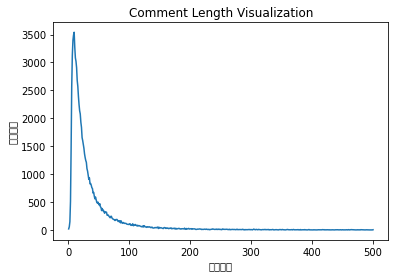

In [294]:
plt.title('Comment Length Visualization')
plt.plot(len_count2['ÎåìÍ∏ÄÍ∏∏Ïù¥'], len_count2['ÎåìÍ∏ÄÍ∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
plt.xlabel('ÎåìÍ∏ÄÍ∏∏Ïù¥')
plt.ylabel('ÎåìÍ∏ÄÍ∞úÏàò')
plt.show()

In [316]:
# ÎåìÍ∏ÄÍ∏∏Ïù¥ 200 Ïù¥ÏÉÅ 1000Ïûê Ïù¥Ìïò
len_count3 = len_count[(len_count['ÎåìÍ∏ÄÍ∏∏Ïù¥'] <= 1000) & (len_count['ÎåìÍ∏ÄÍ∏∏Ïù¥'] >= 200)]
len_count3

ÎåìÍ∏ÄÍ∏∏Ïù¥  ÎåìÍ∏ÄÍ∞úÏàò
199   200    18
200   201    19
201   202    24
202   203    12
203   204    22
..    ...   ...
705   952     2
706   955     1
707   958     1
708   960     1
709   992     1

[511 rows x 2 columns]

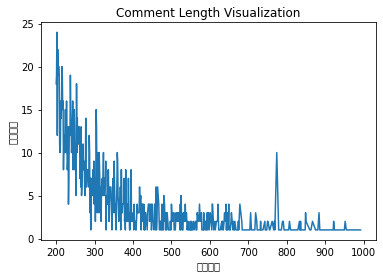

In [317]:
plt.title('Comment Length Visualization')
plt.plot(len_count3['ÎåìÍ∏ÄÍ∏∏Ïù¥'], len_count3['ÎåìÍ∏ÄÍ∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
plt.xlabel('ÎåìÍ∏ÄÍ∏∏Ïù¥')
plt.ylabel('ÎåìÍ∏ÄÍ∞úÏàò')
plt.show()

In [267]:
# ÏïÖÌîå ÎùºÎ≤®ÎßÅÎêú Îç∞Ïù¥ÌÑ∞
bad_comment = preprocessing_df[preprocessing_df['ÏïÖÌîåÏó¨Î∂Ä'] == '2']
bad_comment.head()

ÎåìÍ∏Ä ÏïÖÌîåÏó¨Î∂Ä
103                        ÏßÄÎûÑÏùÑ ÌïúÎã§ Ïó≠Í≤©Î¶¨ Í≥†ÎßôÎã§    2
119                      ÏßÄÎÑ§ÎïåÎ¨∏Ïóê Ïò®ÎÇòÎùºÍ∞Ä ÏßÄÎûÑÎÇ´ÎäîÎç∞    2
130                              Ïß±Í∫ÑÎÇò Ï™ΩÎ∞îÎ¶¨ÎÇò    2
174  ÏßÄÎûÑÌïúÎã§ÎØ∏ÏÑ∏Î®ºÏßÄÎÇò Ïû°ÏïÑÎùº Ï§ëÍµ≠Ïóê ÎßêÎèÑ Î™ªÌïòÎ©¥ÏÑú ÎßêÏùÄ ÏûòÎèÑ Ïî®Î∂ÄÎ¶∞Îã§    2
256                ÏïÑÎ¨¥Î¶¨ ÎÇ¥ÏÉàÎÅºÎùºÎèÑ Îã§Î¶¨Î≥ëÏã† ÎßåÎì§Ïñ¥Î≤ÑÎ†∏ÏùÑÎìØ    2

In [268]:
# ÏïÖÌîå Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥ ÌôïÏù∏
bad_comment['ÎåìÍ∏ÄÍ∏∏Ïù¥'] = bad_comment['ÎåìÍ∏Ä'].apply(lambda x : len(str(x)))

952

In [299]:
bad_len = bad_comment[bad_comment['ÎåìÍ∏ÄÍ∏∏Ïù¥'] <= 500]
bad_len['ÎåìÍ∏ÄÍ∏∏Ïù¥'].max()

500

In [269]:
# ÎåìÍ∏Ä Í∏∏Ïù¥ ÌôïÏù∏
preprocessing_df['ÎåìÍ∏ÄÍ∏∏Ïù¥'] = preprocessing_df['ÎåìÍ∏Ä'].apply(lambda x : len(str(x)))

preprocessing_df['ÎåìÍ∏ÄÍ∏∏Ïù¥'].max()

1978

In [270]:
# ÎåìÍ∏ÄÍ∏∏Ïù¥ ÏãúÍ∞ÅÌôî

import seaborn as sns
import matplotlib.pyplot as plt

In [271]:
len_int = preprocessing_df['ÎåìÍ∏ÄÍ∏∏Ïù¥'].astype(int)
len_sort = len_int.sort_values()
sort_df = pd.DataFrame(len_sort)

len_count = pd.DataFrame(sort_df.groupby(['ÎåìÍ∏ÄÍ∏∏Ïù¥']).size())
len_count.columns = ['ÎåìÍ∏ÄÍ∞úÏàò']
len_count



ÎåìÍ∏ÄÍ∞úÏàò
ÎåìÍ∏ÄÍ∏∏Ïù¥      
1       19
2       56
3      148
4      515
5     1445
...    ...
1812     1
1846     1
1921     1
1945     1
1978     1

[739 rows x 1 columns]

In [272]:
len_count.reset_index(level=0, inplace=True)

In [273]:
len_count

ÎåìÍ∏ÄÍ∏∏Ïù¥  ÎåìÍ∏ÄÍ∞úÏàò
0       1    19
1       2    56
2       3   148
3       4   515
4       5  1445
..    ...   ...
734  1812     1
735  1846     1
736  1921     1
737  1945     1
738  1978     1

[739 rows x 2 columns]

In [274]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ Î¨∏Ï†ú Ìï¥Í≤∞
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Unknown system... sorry~~~~


In [275]:
import matplotlib as mpl
%matplotlib inline

In [276]:
plt.title('Comment Length Visualization')
plt.plot(len_count['ÎåìÍ∏ÄÍ∏∏Ïù¥'], len_count['ÎåìÍ∏ÄÍ∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
# plt.xlabel('ÎåìÍ∏ÄÍ∏∏Ïù¥')
# plt.ylabel('ÎåìÍ∏ÄÍ∞úÏàò')
plt.show()

In [277]:
len_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ÎåìÍ∏ÄÍ∏∏Ïù¥    739 non-null    int64
 1   ÎåìÍ∏ÄÍ∞úÏàò    739 non-null    int64
dtypes: int64(2)
memory usage: 11.7 KB


In [278]:
repl_data

Unnamed: 0  ...                               Ï∂úÏ≤ò
0                0  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
1                1  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
2                2  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
3                3  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
4                4  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
...            ...  ...                              ...
127120         968  ...                   ./data\ÌôçÏÑùÏ≤ú.csv
127121         969  ...                   ./data\ÌôçÏÑùÏ≤ú.csv
127122         970  ...                   ./data\ÌôçÏÑùÏ≤ú.csv
127123         971  ...                   ./data\ÌôçÏÑùÏ≤ú.csv
127124         972  ...                   ./data\ÌôçÏÑùÏ≤ú.csv

[118999 rows x 4 columns]

In [279]:
# ÎåìÍ∏ÄÍ∏∏Ïù¥ 300Ïù¥ÏÉÅ 500Ïù¥Ìïò
repl_data = repl_data[(repl_data['ÎåìÍ∏ÄÍ∏∏Ïù¥'] <= 500) & (repl_data['ÎåìÍ∏ÄÍ∏∏Ïù¥'] >= 300)]
repl_data

KeyError: ignored

In [ ]:
len_int = repl_data['ÎåìÍ∏ÄÍ∏∏Ïù¥'].astype(int)
len_sort = len_int.sort_values()
sort_df = pd.DataFrame(len_sort)

len_count = pd.DataFrame(sort_df.groupby(['ÎåìÍ∏ÄÍ∏∏Ïù¥']).size())
len_count.columns = ['ÎåìÍ∏ÄÍ∞úÏàò']
len_count


In [ ]:
len_count.reset_index(level=0, inplace=True)

In [ ]:
len_count.head()

In [ ]:
plt.title('Comment Length Visualization')
plt.plot(len_count['ÎåìÍ∏ÄÍ∏∏Ïù¥'], len_count['ÎåìÍ∏ÄÍ∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
# plt.xlabel('ÎåìÍ∏ÄÍ∏∏Ïù¥')
# plt.ylabel('ÎåìÍ∏ÄÍ∞úÏàò')
plt.show()

In [ ]:
# ÏïÖÌîå ÎåìÍ∏Ä Í∏∏Ïù¥ ÏãúÍ∞ÅÌôî
dict_label = pd.read_csv('/content/gdrive/My Drive/eda_data/dict_label.csv')

In [ ]:
dict_label['ÎåìÍ∏ÄÍ∏∏Ïù¥'] = dict_label['ÎåìÍ∏Ä'].apply(lambda x : len(str(x)))

In [ ]:
# ÏïÖÌîå ÏµúÎåÄ ÎåìÍ∏Ä Í∏∏Ïù¥
dict_label['ÎåìÍ∏ÄÍ∏∏Ïù¥'].max()

In [ ]:
dict_label.head()
dict_bad = dict_label[(dict_label['ÏïÖÌîåÏó¨Î∂Ä'] == 2) | (dict_label['ÏïÖÌîåÏó¨Î∂Ä'] == 1)]
dict_bad

In [ ]:
dict_int = dict_bad['ÎåìÍ∏ÄÍ∏∏Ïù¥'].astype(int)
dict_int
dict_sort = dict_int.sort_values()
dict_df = pd.DataFrame(dict_sort)
dict_df
dict_count = pd.DataFrame(dict_df.groupby(['ÎåìÍ∏ÄÍ∏∏Ïù¥']).size())
dict_count


In [ ]:
dict_count.columns = ['ÎåìÍ∏ÄÍ∞úÏàò']
dict_count.head()

In [ ]:
dict_count.reset_index(level=0, inplace=True)
dict_count.head()

In [ ]:
plt.title('Bad Comment Length Visualization')
plt.plot(dict_count['ÎåìÍ∏ÄÍ∏∏Ïù¥'], dict_count['ÎåìÍ∏ÄÍ∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
# plt.xlabel('ÎåìÍ∏ÄÍ∏∏Ïù¥')
# plt.ylabel('ÎåìÍ∏ÄÍ∞úÏàò')
plt.show()

In [ ]:
# Ïö∞Î¶¨Í∞Ä ÎßåÎì† ÏïÖÌîå Î≠âÏπòÎ°ú ÎùºÎ≤®ÎßÅ ÏãúÍ∞ÅÌôî

In [ ]:
dict_label2 = pd.read_csv('/content/gdrive/My Drive/eda_data/dict_label.csv')
dict_label2 = dict_label.groupby(['ÏïÖÌîåÏó¨Î∂Ä']).size()
dict_label2_df = pd.DataFrame(dict_label2)
dict_label2_df.columns = ['Í∞úÏàò']
dict_label2_df.head()

In [ ]:
dict_label2_df.index = ['ÏïÖÏÑ±ÏúÑÌóòÎåìÍ∏Ä(1)', 'ÏïÖÏÑ±ÎåìÍ∏Ä(2)']
dict_label2_df.head()

In [ ]:
dict_label2_df.reset_index(level=0, inplace=True)

In [ ]:
dict_label2_df.columns = ['ÎåìÍ∏ÄÎ∂ÑÎ•ò', 'Í∞úÏàò']
dict_label2_df.head()

In [ ]:
plt.title('Dictionary Labeled Comment Visualization')
plt.bar(dict_label2_df['ÎåìÍ∏ÄÎ∂ÑÎ•ò'], dict_label2_df['Í∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
plt.xlabel('ÎåìÍ∏ÄÎ∂ÑÎ•ò')
plt.ylabel('Í∞úÏàò')
plt.show()

In [ ]:
# Ïö∞Î¶¨Í∞Ä ÏßÅÏ†ë ÎùºÎ≤®ÎßÅ ÌõÑ EDA
human_label = pd.read_csv('/content/gdrive/My Drive/eda_data/human_label.csv')
label_count = human_label.groupby(['ÏïÖÌîåÏó¨Î∂Ä']).size()
label_count_df = pd.DataFrame(label_count)
label_count_df.columns = ['Í∞úÏàò']
label_count_df.head()

In [ ]:
label_count_df.index = ['ÏùºÎ∞òÎåìÍ∏Ä(0)', 'ÏïÖÏÑ±ÏúÑÌóòÎåìÍ∏Ä(1)', 'ÏïÖÏÑ±ÎåìÍ∏Ä(2)']
label_count_df.head()

In [ ]:
# Ïù∏Îç±Ïä§ Ï°∞Ï†ï
label_count_df.reset_index(level=0, inplace=True)

In [ ]:
label_count_df.columns = ['ÎåìÍ∏ÄÎ∂ÑÎ•ò', 'Í∞úÏàò']
label_count_df.head()

In [ ]:
plt.title('Labeled Comment Visualization')
plt.bar(label_count_df['ÎåìÍ∏ÄÎ∂ÑÎ•ò'], label_count_df['Í∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
plt.xlabel('ÎåìÍ∏ÄÎ∂ÑÎ•ò')
plt.ylabel('Í∞úÏàò')
plt.show()